In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
def model_svm(x_train, y_train, x_test):
    cs = SVC(kernel = 'linear', random_state = 0)
    cs.fit(x_train, y_train)
    y_pred = cs.predict(x_test)
    return y_pred, cs

In [14]:
def model_lda(x_train, y_train, x_test, n):
    lda = LDA(n_components = n)
    lda.fit(x_train, y_train)
    train = lda.transform(x_train)
    test = lda.transform(x_test)
    return train ,test

In [3]:
#plotting only two classes
def discovery_plotting(x, y, colors, target, title):
    indexer = range(len(np.unique(target)))
    label = np.unique(y)
    plt.figure(figsize = (12,10))
    for index, color, lbl in zip(indexer, colors, label):
        plt.scatter(x[y == lbl, 0],
                    x[y == lbl, 1],
                    label= lbl,
                    c = color)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [4]:
dataset_train = pd.read_csv("Pokemon_train.csv")
dataset_test = pd.read_csv("Pokemon_test.csv")

In [5]:
#split data to be fitted and tested after that
x_dataset_train = dataset_train.iloc[:, 0:32]
y_dataset_train = dataset_train.iloc[:, 32]
x_dataset_test = dataset_test.iloc[:, 0:32]
y_dataset_test = dataset_test.iloc[:, 32]

# discover data

### reduce dimension to visualize data

In [34]:
reduced_dataset_train =  TSNE(n_components=2, random_state=0).fit_transform(x_dataset_train)
reduced_dataset_test =  TSNE(n_components=2, random_state=0).fit_transform(x_dataset_test)
colors = ['#27979b', '#2f1013', '#102f2c', '#009ac0', '#fd78a0', '#a2a2d0', '#f1c232', '#000000',
          '#cc0000', '#f6b26b', '#9fc5e8', '#8fce00', '#fff2cc', '#00b8fc', '#bcbcbc', '#6aa84f', '#ce7e00']

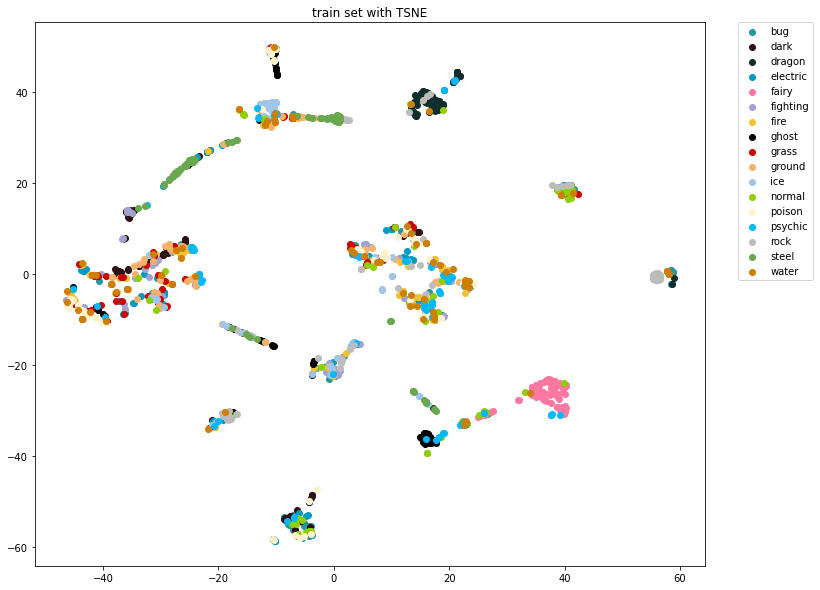

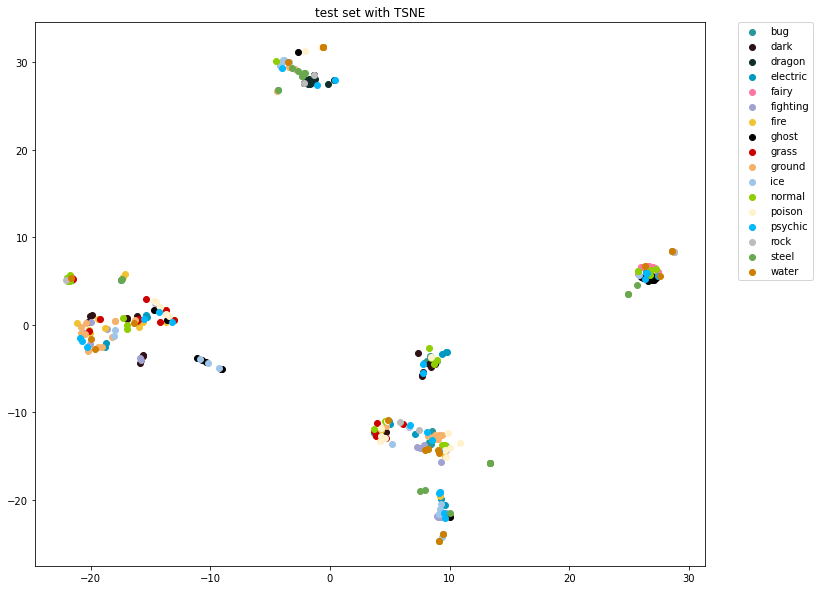

In [35]:
discovery_plotting(reduced_dataset_train, y_dataset_train, colors, dataset_train['type1'], "train set with TSNE")
discovery_plotting(reduced_dataset_test, y_dataset_test, colors, dataset_test['type1'], "test set with TSNE")

In [22]:
#converting the categorical to numericaldata
encoder = LabelEncoder()
encoder_train = encoder.fit_transform(y_dataset_train)
encoder_test = encoder.fit_transform(y_dataset_test)

In [41]:
reduced_train_data_lda, reduced_test_data_lda = model_lda(x_dataset_train, encoder_train, x_dataset_test, 2)
pred_svm_lda, svm_model_lda = model_svm(reduced_train_data_lda, encoder_train, reduced_test_data_lda)
acc = accuracy_score(encoder_test, pred_svm_lda)*100
acc


68.370607028754